#**Classificando músicas do spotify 🎵**

Nesse notebook vou criar um modelo preditivo para claissificar as músicas lentas e agitadas utilizando uma base de dados "Spotify Tracks Dataset" do Kaggle.

O link da base de dados e mais detalhes você encontra em : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [14]:
#Transformando a base de dados em um Data Frame utilizando a biblioteca do pandas
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#Entendendo a estrutura dos dados
df.shape

(114000, 21)

#**Criando a variável target 🎯**


De acordo com as regras da base de dados a coluna "Valence" é uma medida de **0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa.** Faixas com alta valência soam mais postivas (elas são mais felizes, alegres e eufóricas), enquanto faixas com baixa valência soam mais negativas (elas são mais tristes, deprimidas e melancolicas)

**Obs:** Vale frisar que não obrigatoriamente uma música agitada vai ser feliz e uma musica lenta vai ser triste, por isso vou seguir o projeto chamando as musicas de agitadas e lentas essa comparação foi apenas a titulo de explicação.


Para criar a nossa coluna alvo (Variável target) do modelo preditivo
, vamos utilizar a coluna "valence" para ser nosso critério de músicas agitadas ou lentas


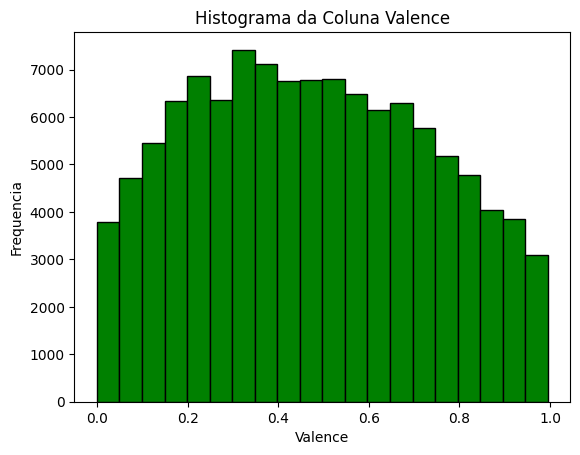

,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


In [39]:
 #Fazendo uma analise exploratoria dos dados com foco na coluna valence
 import matplotlib.pyplot as plt
 plt.hist(df['valence'],bins=20, color='Green', edgecolor='black')
 plt.xlabel ('Valence')
 plt.ylabel('Frequencia')
 plt.title('Histograma da Coluna Valence')
 plt.show()
 df['valence'].describe()

In [15]:
#Criar uma função que classifica a musica em lenta ou agitada com base no valence
def catergorizar_valence(row):
  if row['valence'] > 0.5:
    return 'agitada'
  else:
    return 'lenta'
#Criar uma nova coluna 'O target' usando a funçao catergorizar_valence
df['target'] = df.apply(catergorizar_valence, axis=1)
# O "axis=1 é essencial para o codigo entender que estamos tratando de
# colunas,se fosse linha seria axis=0"
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


#**Feature engineering 🔨**


Agora vou criar um novo dataframe utilizando apenas as colunas necessárias, visando realizar uma limpeza nos dados e tornar o processo mais ágil sem perder a informação da base original.

In [ ]:
#Facilitar na identificação e seleção das colunas
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [16]:
#Vou retirar o ID pois não vai ser necessário realizar nenhuma relação com outra tabela
df_musica = df.drop(['Unnamed: 0','track_id'], axis=1)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


#**Tratando os dados categóricos 🅰**


Vamos utilizar o LabelEncoder para codificar rótulos de classes em números inteiros. É essencial para Machine Learning quando se trata de um aprendizado supervisionado que necessitam de rótulos numéricos



In [17]:
#Criando a função que codifica o dataframe
def label_encoder_dataframe(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
# Iniciando o loop para percorrer por toda a minha base e executar uma ação
  # quando acontecer a condicional
  for column in columns_to_encode:
    if column in df.columns:
      df[column] = le.fit_transform(df[column])
    else:
      print('A lista possui colunas que não existem no DataFrame')
  return df
# Selecionando quais colunas vão ser codificadas
colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit','track_genre','target']
label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


#**Analisando as variáveis que vão compor nosso modelo 📊**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

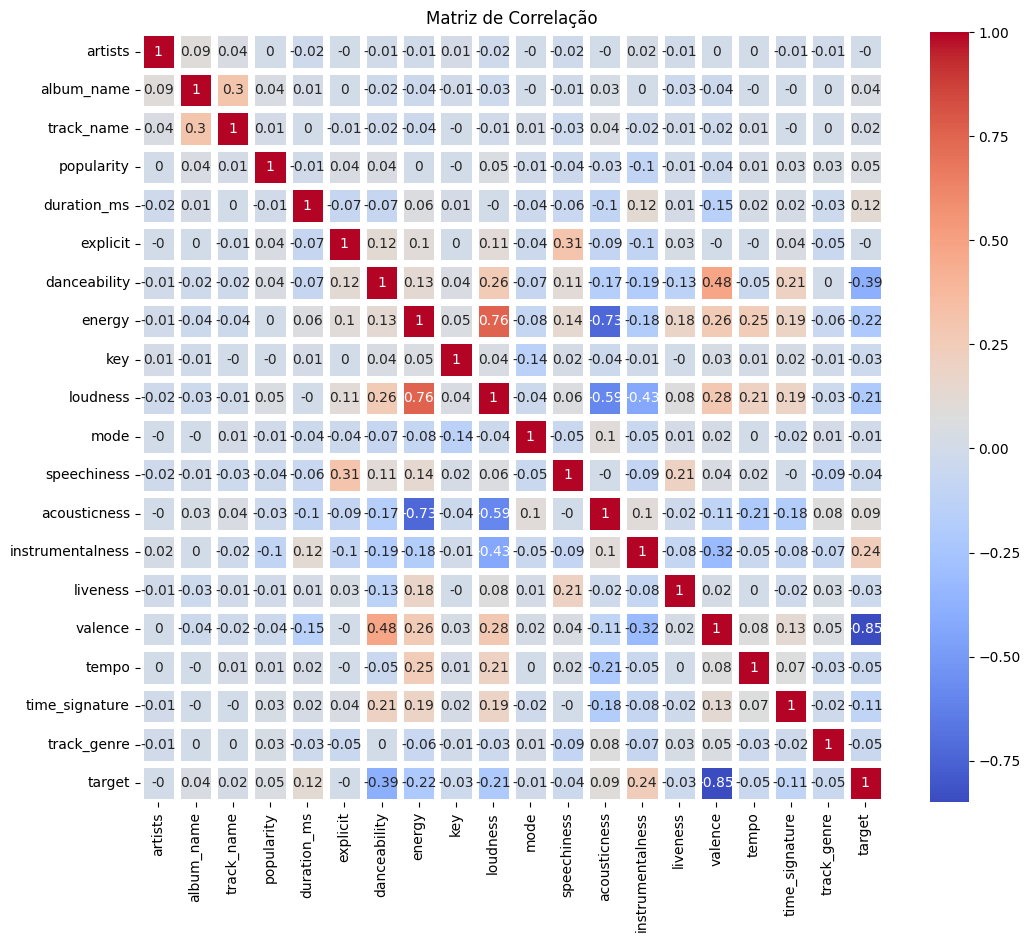

In [ ]:
#Importando o seaborn para conseguir realizar um mapa de calor mais visual
import seaborn as sns
#Aqui eu estou criando minha matrix de correlação e arrendondando os dados para
#apenas duas casas decimais e colocando os dados da forma que acredito ser o mais visual o possível
correlation_matrix = df_musica.corr().round(2)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths = 5, ax=ax, cmap='coolwarm', )
plt.title('Matriz de Correlação')
plt


#**Entendendo o equilíbrio da target 🎯**

In [18]:
#Verificando o equilibrio das classes
round(df_musica['target'].value_counts(normalize=True)*100,2)

,proportion
target,
1,54.37
0,45.63


Vou fazer um set do target dos dois dataframes para entender qual a conversão que foi feita nesses dados  no processo do encode, para que eu possa garantir com certeza que 0 são músicas agitadas e 1 são músicas lentas

In [ ]:
set(df['target'])


{'agitada', 'lenta'}

In [19]:
set(df_musica['target'])

{0, 1}

Após a verificação desse equilibrio percebi que havia um desquilibrio para 1 (musicas lentas), pórem nada que fosse exorbitante para exigir uma preocupação e conforme analisamos no histograma dos dados, de fato músicas lentas são mais frequentes nessa base de dados

#**Separando os dados em treino e teste ✅**


Neste projeto, utilizarei o método hold-out, onde 80% dos meus dados serão alocados para o treinamento da máquina e os 20% restantes serão utilizados para testes. Essa abordagem garantirá uma diversidade significativa de dados para o aprendizado, ao mesmo tempo em que preserva uma quantidade relevante de dados desconhecidos para a validação do meu modelo.

In [20]:
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [30]:
#Importando da biblioteca a classe que me permite separar os dados entre treino e teste de forma aleatoria
from sklearn.model_selection import train_test_split
#Separando os dados entre as variaveis independentes e a dependente
X = df_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']
#Separando agora 80% dos dados para treino e 20% dos dados para teste.
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, stratify=y, random_state=7)

In [31]:
#analisando o quantidade dos meus dados de treino e teste
print(X_train.shape)
print(X_test.shape)

(91200, 9)
(22800, 9)


#**Normalizando os dados 📏**

Vou aplicar o MinMaxScaler para que todos os valores sejam transformados em algum valor entre 0 e 1, onde o valor minimo é 0 e o maximo é 1. Esse processo é essencial para que o aprendizado de maquina não seja enviesado por uma desproporção entre as escalas.

Vale ressaltar que a normalização precisa ser feita após a separação dos dados para evitar algum Data Leak, já que se todos os dados forem normalizados juntos a base de teste e base de treino podem transpor informações entre si e isso causaria uma avaliação muito otimista do modelo


In [33]:
#Importando a a classe que vai normalizar os dados entre 0 e 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Aqui eu ajusto a escala dos dados de treino
scaler.fit(X_train)
#Aplico a nova escala dentro da variável
X_train_escaled = scaler.transform(X_train)
X_test_escaled = scaler.transform(X_test)

#**Função para execução do modelo de machine learning 🤖**

Agora vou criar uma função que vai executar o modelo preditivo e avaliar a sua performance utilizando as prinicipais métricas de validação.

In [36]:
def roda_modelo(modelo):
  #Importando as métricas de avaliação do modelo
  from sklearn.metrics import roc_curve, roc_auc_score, classification_report

  #Treinando o modelo com os dados de treino
  modelo.fit(X_train_escaled, y_train)

  #Calculando a probabilidade e calculando o AUC
  prob_predic = modelo.predict_proba(X_test_escaled)
  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f"AUC {auc}")

  #Fazendo a predicao dos dados de teste e calculando o report de classificação
  predicao = modelo.predict(X_test_escaled)
  print("\nClassification Report")
  print(classification_report(y_test, predicao))

  print("\nRoc Curver\n")
  # Fazer a previsão de probabilidades
  y_pred_probs = modelo.predict_proba(X_test_escaled)[:, 1]

  # Calcular a curva ROC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

  # Calcular a AUC
  auc = roc_auc_score(y_test, y_pred_probs)

  # Plotar a curva ROC
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
  plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
  plt.xlabel('Taxa de Falso Positivo')
  plt.ylabel('Taxa de Verdadeiro Positivo')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()

  # Converter probabilidades em classes preditas 0 ou 1

  y_pred = (y_pred_probs > 0.5).astype(int)



#**Regressão Logística 📉**

O modelo se baseia em uma função logística, que transforma as variáveis independentes em uma probabilidade entre 0 e 1. Para novas entradas de dados, o modelo calcula a probabilidade do evento binário ocorrer.

AUC 0.7962019382303666

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curver



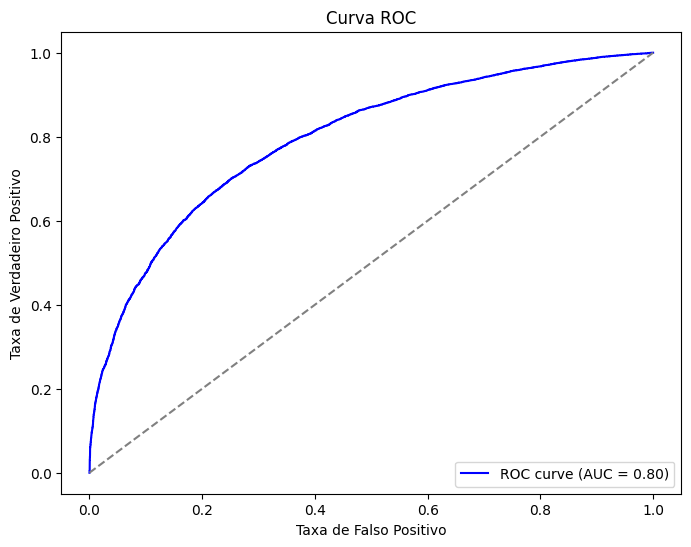

In [40]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

A acuraci esta em 0.72 e o f1-score esta em 0.69 e O AUC esta em 0.79, são metricas boas, porém eu gostaria que o modelo fosse ainda mais confiável e por isso vou aplicar um método de ensemble learning

#**Random Florest 🍀**

Vou utilizar o Random Florest Classifier é um algoritmo de esemble learning, esse por sua vez combina vários modelos para melhorar a performance e consequentemente a confiabilidade.
O modelo cria uma flortesta de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório dos dados(bootstrap). A classe final do novo ponto de dados é a classe mais votada pelas árvores da floresta.



AUC 0.8304249645164204

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     10403
           1       0.77      0.77      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curver



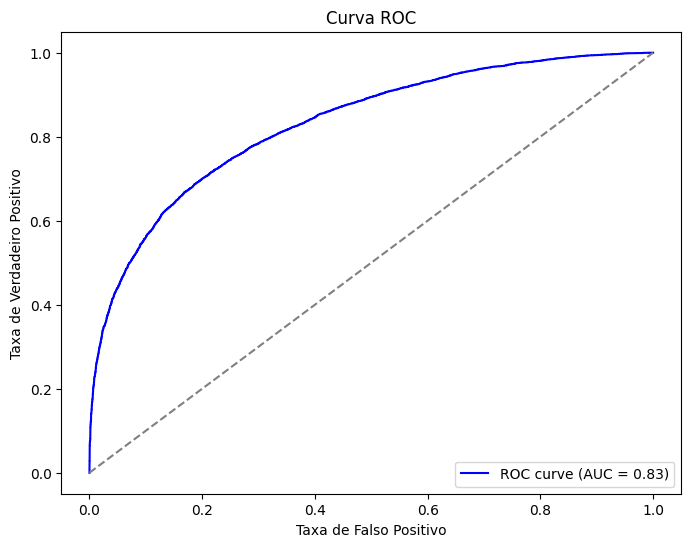

In [43]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_florest = RandomForestClassifier(max_depth = 7, n_estimators = 100)
roda_modelo(modelo_random_florest)

#**Proximos passos do projeto 🚶**

O teste ainda não esta com a melhor performance possível, acredito que com alguns parâmetros de Grid Search eu consigo resultados melhores, pórem ainda preciso estudar um pouco mais sobre como esses parâmetros funcionam.

#**Testando o modelo 💻**

Criei uma nova base com duas linhas de dados sem a coluna de valencia para testar o modelo de forma limpa.


In [46]:
import numpy as np

novos_dados = pd.read_excel ("dados_limpos.xlsx")
base_original = pd.read_excel('dados_limpos.xlsx')

# Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

#Realize a previsão usando o modelo Random Forest
previsoes = modelo_random_florest.predict(novos_dados)

#Obtendo o predict
def mapear_valor(valores):
  resultados = []
  for valor in valores:
    if valor == 0:
      resultados.append('Musica agitada')
    elif valor == 1:
      resultados.append('Musica lenta')
    else:
      resultados.append('Desconhecido')
  return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Musica agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Musica lenta
